# Simple Correlation Function Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import scipy.special

In [2]:
plt.style.use('./correlation.mplstyle')

In [3]:
def matern(x, n_range, epsilon):
    left = 2**(1-epsilon) / scipy.special.gamma(epsilon)
    delta_hat = 8*epsilon / (n_range**2)
    #delta_hat = 2*epsilon / (n_range**2)
    arg = np.sqrt(delta_hat) * x 
    #middle = np.where(arg==0, 1, arg**epsilon)
    middle = arg ** epsilon
    right = np.where(arg == 0, 1, scipy.special.kv(epsilon, arg))
    result = left * middle * right
    result = np.where(arg == x, 1, result)
    return result

In [4]:
def matern_applications(epsilon, d):
    M = (epsilon + d/2)/2
    assert M == int(M)
    return  M

In [5]:
def gaussian(x, n_range):
    return np.exp(-2*x**2/n_range**2)
    #return np.exp(-x**2/n_range**2/2)

In [6]:
def beta(j, m):
    numer = 2**j * np.math.factorial(m-1) * np.math.factorial(2*m - j - 2)
    denom = np.math.factorial(j) * np.math.factorial(m-j-1) * np.math.factorial(2*m-2)
    return numer / denom

In [7]:
def ar(x, n_range, m):
    L = .5 * (2*m - 3) ** (-.5) * n_range
    summ = np.sum([beta(j,m)*(x/L)**j for j in range(1,m)], axis=0)
    return (1 + summ) * np.exp(-x / L)

In [8]:
rho_hat = 4
x = np.arange(0,10,0.1)

In [9]:
g = gaussian(x, rho_hat)

Matern: m, error.max 1.0 0.28752587190687084
Matern: m, error.max 2.0 0.08389325995414498
AR: m, error.max 2 0.2706705664732254
AR: m, error.max 4 0.08683829061184326


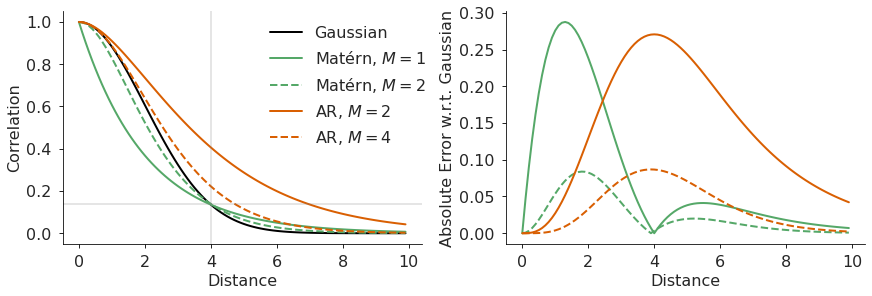

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

# The correlations themselves
axs[0].plot(x, g, color='k', label='Gaussian')

color = None
linestyles = ['-','--']
for epsilon, ls in zip([1/2, 5/2], linestyles):
    
    # correlation
    y = matern(x, rho_hat, epsilon)
    m = matern_applications(epsilon, d=3)
    label = r"Matérn, $M = %d$" % m
    p = axs[0].plot(x, y, ls=ls, color=color, label=label)
    color = p[0].get_color()
    
    # error
    y = np.abs(y - g)
    axs[1].plot(x, y, ls=ls, color=color)
    print("Matern: m, error.max", m, y.max())

color = None
for m, ls in zip([2,4],linestyles):
    y = ar(x, rho_hat, m)
    label = r"AR, $M = %d$" % m
    p = axs[0].plot(x, y, ls=ls, color=color, label=label, alpha=1)
    color = p[0].get_color()
    
    # error
    y = np.abs(y - g)
    axs[1].plot(x, y, ls=ls, color=color)
    print("AR: m, error.max", m, y.max())

[ax.set(xlabel='Distance') for ax in axs]
axs[0].set(ylabel="Correlation")
axs[1].set(ylabel="Absolute Error w.r.t. Gaussian")

axs[0].axhline(y=0.14, color='gray', alpha=.2)
axs[0].axvline(x=rho_hat, color='gray', alpha=.2)
axs[0].legend(bbox_to_anchor=(1.05,1.))
fig.savefig(f"../figures/correlation_comparison.pdf", bbox_inches='tight')